## importind the dependencies 

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


## data ollection and analysis

In [5]:
# loading the dataset from csv file to pandas data frame 
big_mart_data=pd.read_csv(r"C:\Users\USER\Downloads\Train.csv")

In [6]:
# print first 5 rows
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# the num of data points and num of features
big_mart_data.shape

(8523, 12)

In [8]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### categorical features
#### 1--Item_Identifier            
#### 2--Item_Fat_Content           
#### 3--Item_Type                  
#### 4--Outlet_Identifier          
#### 5--Outlet_Size                
#### 6--Outlet_Location_Type       
#### 7--Outlet_Type                

In [9]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### handling missing values 

### mean ----> average of the values 


In [19]:
# mean value of item weight column
big_mart_data['Item_Weight'].mean()


# filling these mean values in item weight column
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [20]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### mode ----> mostly repeated value

In [23]:
# Assuming big_mart_data is your DataFrame
mode_of_outlet_size = big_mart_data.pivot_table(
    values='Outlet_Size',  # Corrected from 'value' to 'values'
    index='Outlet_Type',    # Use 'index' to specify the rows
    aggfunc=lambda x: x.mode()[0]  # Calculate the mode
)

print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [24]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [25]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [28]:
big_mart_data.loc[missing_values,'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [29]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## data analysis

In [30]:
# ststistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### numerical features

C:\Users\USER\AppData\Local\Temp\ipykernel_11084\1433995613.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


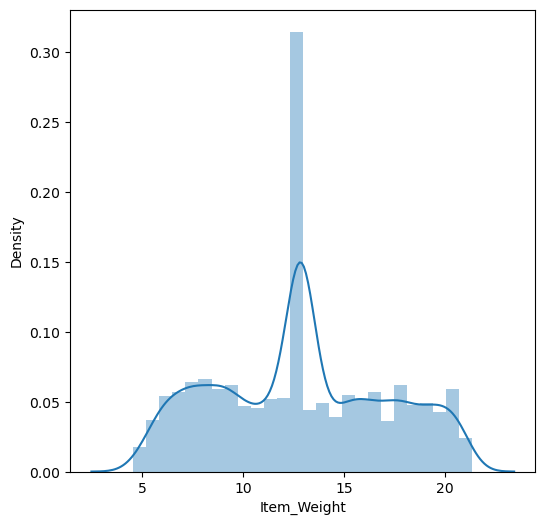

In [35]:
# item weight distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11084\2462308873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


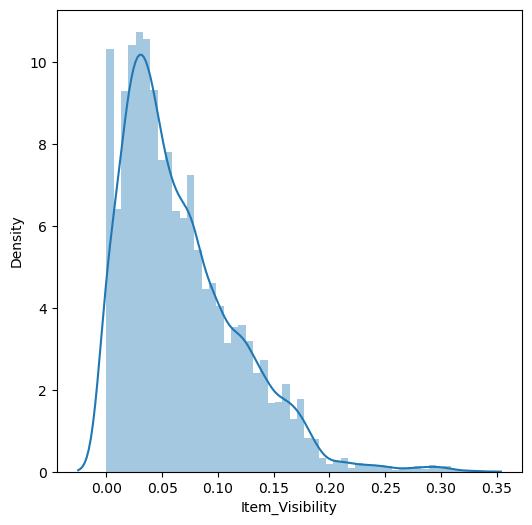

In [36]:
# Item_Visibility distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11084\2877071733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


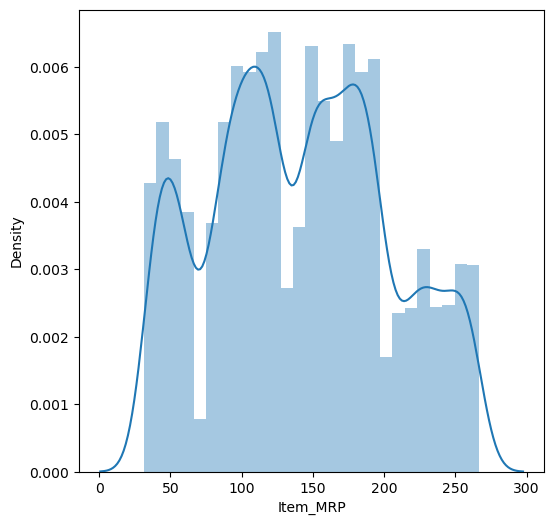

In [37]:
# Item_MRP distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11084\2800538988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


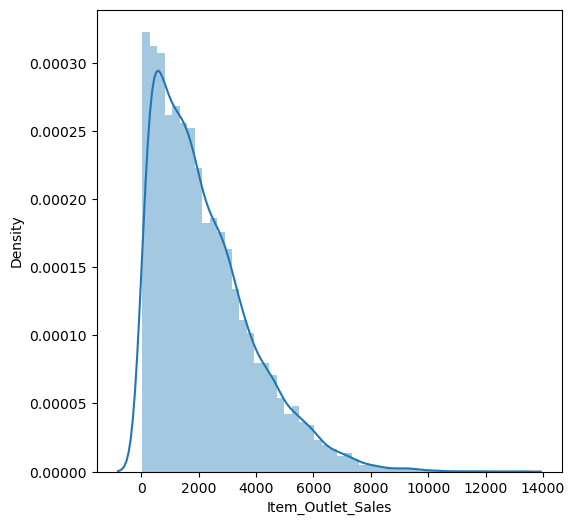

In [38]:
# Item_Outlet_Sales distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

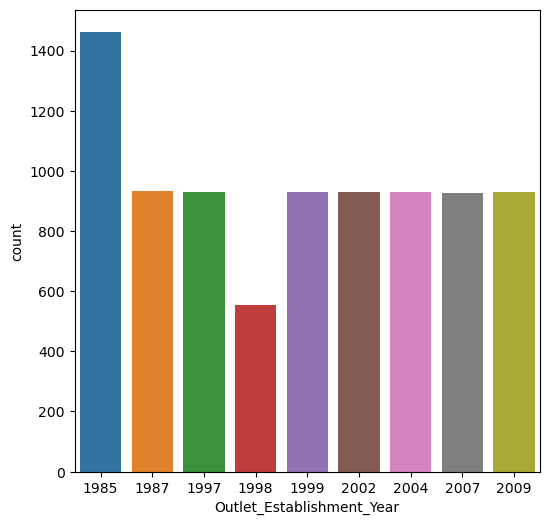

In [39]:
# outlet_establishment_yesr column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

### categorical features

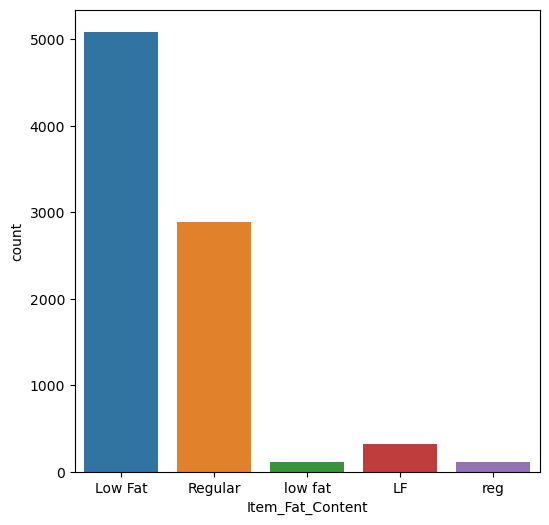

In [40]:
# outlet_establishment_yesr column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

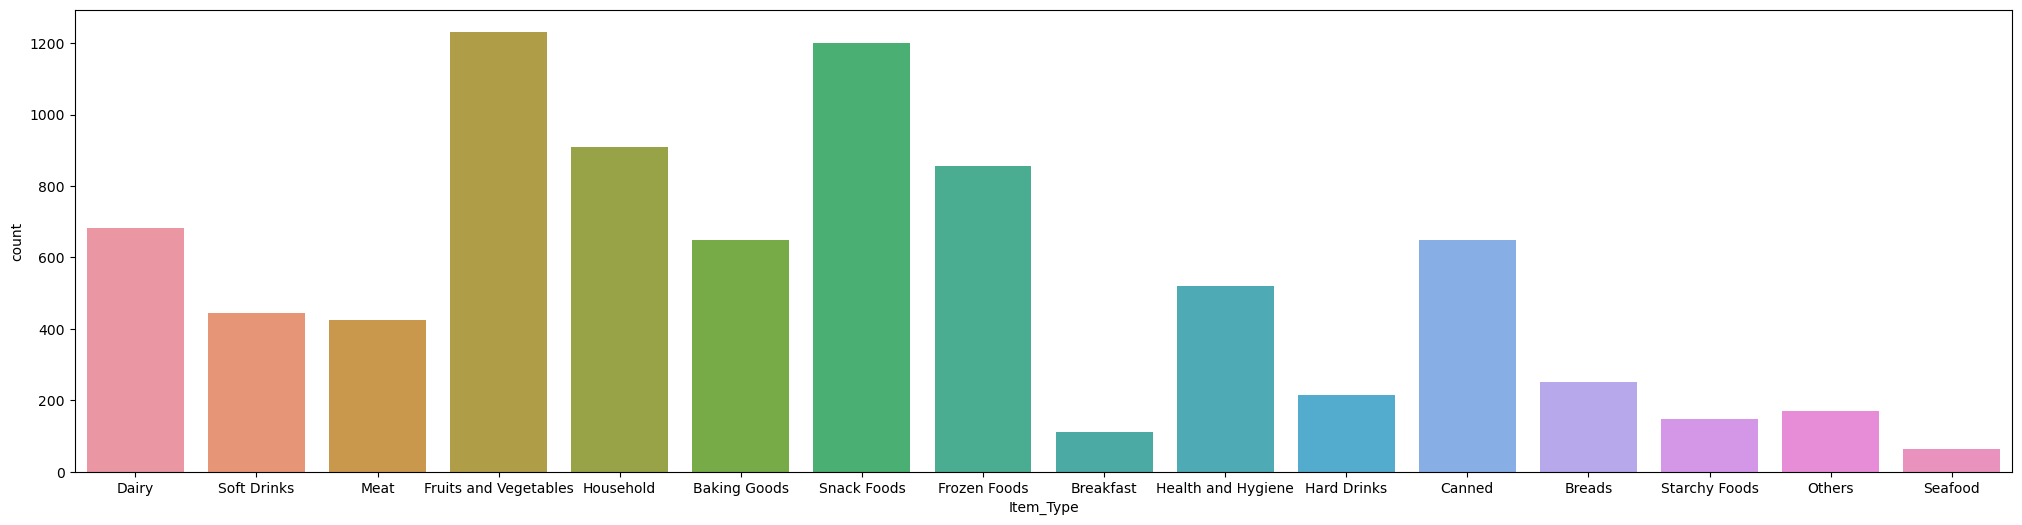

In [46]:
# item_type columns
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

## data pre-processing

In [64]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Size Outlet_Type ...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [67]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'low fat','LF':'low fat','reg':'regular'}},inplace=True)

In [68]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
low fat     428
regular     117
Name: count, dtype: int64

## Label Encoding

In [79]:
encoder = LabelEncoder()

In [90]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])
#big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [98]:
print(big_mart_data.dtypes)

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object


In [99]:
big_mart_data[['Outlet_Size']]

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Outlet_Size Outlet_Type ...
4,High
...,...
8518,High
8519,Outlet_Size Outlet_Type ...
8520,Small
8521,Medium


In [100]:
# Fill missing values with the mode
mode_outlet_size = big_mart_data['Outlet_Size'].mode()[0]
big_mart_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [101]:
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)

In [102]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the Outlet_Size column
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

# Check the transformed values
print(big_mart_data['Outlet_Size'].head())

0    2
1    2
2    2
3    0
4    1
Name: Outlet_Size, dtype: int32


In [103]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,2,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,2,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052


## split the features and target

In [104]:
x=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
y=big_mart_data['Item_Outlet_Sales']

In [105]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,2,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,2,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,2,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,0,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,1,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,0,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,3,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,2,2,2


In [106]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### splitting the data into training & testing data 

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,)

In [108]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## machine learning model training

In [109]:
model=XGBRegressor()

In [110]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## evaluation

In [111]:
# prediction on training data
training_data_pred=model.predict(x_train)
training_data_pred

array([2342.9712, 2784.6833, 3111.5596, ..., 2866.6077, 2019.5905,
       2081.0818], dtype=float32)

In [113]:
# r square value
r2_train=metrics.r2_score(y_train,training_data_pred)

In [114]:
print('r2 score on training data:',r2_train)

r2 score on training data: 0.883400183077253


In [115]:
# prediction on testing data
testing_data_pred=model.predict(x_test)
testing_data_pred

array([1994.0089, 1832.6211, 1561.5828, ..., 2320.8005, 2427.1614,
       3643.9392], dtype=float32)

In [116]:
# r square value
r2_test=metrics.r2_score(y_test,testing_data_pred)

In [118]:
print('r2 score on testing data:',r2_test)

r2 score on testing data: 0.5066046918117758
